In [366]:
import numpy as np
import scipy.stats as si

def Black_Scholes_Algo(S, K, T, r, sigma):
	    #S: spot price
	    #K: strike price
	    #T: time to maturity
	    #r: interest rate
	    #sigma: volatility of underlying asset
	    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
	    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
	    
	    call = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(
            -r * T) * si.norm.cdf(d2, 0.0, 1.0))
	    return call
# current stock price 
S0 = 100; S = S0
# initial time

t0 = 0
# time until option experiance,
call_maturiy_T = 1;
t = call_maturiy_T
#steady; risk-free-rate
r=0.05
# K = Options striking pruce
K = 120
volatility_sigma = 0.2; s = volatility_sigma
C = Black_Scholes_Algo(S,K,t,r,s)
print("EX 1.1: the value of this call at t = 0 IS c = ", C)


EX 1.1: the value of this call at t = 0 IS c =  3.247477416560816


	    """
	    N = number of binomial iterations
	     / tree deth
	    S0 = initial stock price
	    u = factor change of upstate
	    /volatility
	    r = risk free interest rate per annum
	    K = strike price"""
        

In [367]:

# binomial tree to determine the call option value.
# according to pages 3 and 4 of https://pdfs.semanticscholar.org/c04c/7cf10756da8424a31061ef8cd52a42bbe1bd.pdf
def binomial_model(N, S0, s, r, K, t_maturity):
    t=t_maturity/N
    u = np.e**(s*np.sqrt(t))
    d = np.e**(-s*np.sqrt(t))
    p = (np.e**(r*t) - d ) / (u-d); 
    stock = np.zeros([N + 1, N + 1])
    
    stock[0][0] = S0
    
    for i in range(1, N + 1):
        for j in range(0, i + 1):
            stock[j, i] = S0 * (u ** j) * (d ** (i-j))

    option = np.zeros([N + 1, N + 1])
    stock_max = stock[:,N]
    for j in range(N+1):
        option[:, j] = np.maximum(
            np.zeros(N+1), 
            (stock_max[j] - K)
        )
        
    for i in range(N-1, -1, -1):
        for j in range(0,i+1):
            option[i,j] = (np.e**(-r * t) )* (p * option[i+1,j+1] + (1 - p) * option[i+1,j])

    return option[0][0]


# current stock price
S0 = 100
# initial time
t0 = 0
# time until option experiance,
call_maturiy_T = 1;
#steady; risk-free-rate
r=0.05
# K = Options striking pruce
K = 120
s = 0.2
max_tree_depth = 300
# binomial_model(max_tree_depth, S0, s, r, K, call_maturiy_T)
tree_depths = [ x for x in range(1, max_tree_depth)] 
models = [
	 binomial_model(N, S0, s, r, K, call_maturiy_T)
	 for N in tree_depths
]



According to theory the binomial model the binomial 
converges on the Black–Scholes formula value as the number of time steps increases.
The following convergence can be seen below too 


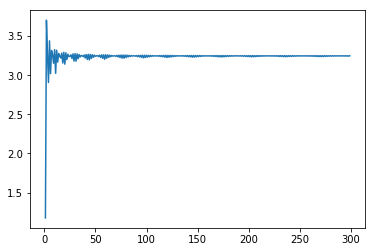

In [365]:
import matplotlib.pyplot as plt
plt.plot( tree_depths, models)
plt.xlabel("tree depth")
plt.ylabel(" call value")
plt.title(" ")